In [39]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
# Feel free to add any imports you need

In [4]:
candidate_scores = pd.read_csv('data/candidate_scores.csv')
hr_scores = pd.read_csv('data/hr_scores.csv')

# Section 1

In [ ]:
# to merge by name, assumint that the name is the same in both datasets
candidate_scores["merge_name"] = (
    candidate_scores["candidateName"]
    .str.lower()
    .str.replace(r"[^a-z ]", "", regex=True)
)
hr_scores["merge_name"] = (
    hr_scores["candidateName"].str.lower().str.replace(r"[^a-z ]", "", regex=True)
)

In [37]:
# Inner merge, I left duplicate rows in candidate_scores
merged = (
    pd.merge(
        candidate_scores,
        hr_scores,
        on="merge_name",
        suffixes=("_candidate", "_hr"),
        how="inner",
    )
    .drop(columns=["merge_name", "candidateName_candidate"])
    .rename(columns={"candidateName_hr": "candidateName"})
    .reset_index(drop=True)
)

In [38]:
merged.to_csv("data/merged_scores.csv", index=False)

In [ ]:
# numebr of duplicate rows
merged[merged["candidateName"].duplicated(keep=False)]

,id,createdAt,updatedAt,overallScore,dataSources,status,professionalScore,culturalScore,teamScore,punchline,contextID,candidateName,hrScore
34,94,38:02.3,38:36.4,75.0,"{Linkedin,CV}",Completed,79,72.4,71.5,Solid fit with room for industry-specific growth.,10,Dusk Twilightshade,4
35,95,40:59.9,41:30.6,75.0,"{Linkedin,CV}",Completed,79,74.0,75.0,Solid fit with minor domain adaptation needed.,10,Dusk Twilightshade,4
45,112,40:22.1,40:58.9,45.0,"{Linkedin,CV}",Completed,46,40.0,37.5,Technical skills not aligned with product mana...,10,Gale Windrider,4
46,113,41:21.8,42:02.3,45.0,"{Linkedin,CV}",Completed,58,35.6,42.5,Limited fit due to lack of industry and role-s...,10,Gale Windrider,4


In [46]:
px.histogram(merged, x="overallScore", color="hrScore").show()

<Axes: xlabel='hrScore'>

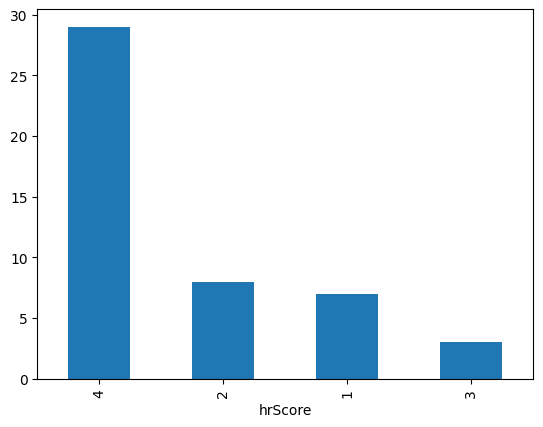

In [45]:
merged["hrScore"].value_counts().plot(kind="bar")

# Section 2

# Section 3